# Drawing heliographic longitude and latitude lines

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/lat_lon_lines.html

This example demonstrates how you can draw individual Stonyhurst
longitude and latitude lines.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames
from sunpy.data.sample import AIA_171_IMAGE

We will first demonstrate the coordinate transformations that occur under the
hood to show a heliographic grid line of longitude or latitude.
Let's start with a map using the sample data.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)

We can define a heliographic coordinate for a single point.

In [ ]:
lon_value = 35 * u.deg
lat_value = 12 * u.deg
stonyhurst_frame = frames.HeliographicStonyhurst(obstime=aia.date)
point_in_stonyhurst = SkyCoord(lon=lon_value, lat=lat_value, frame=stonyhurst_frame)

Next we transform it into the coordinate frame of our map, which is helioprojective.

In [ ]:
point_in_hpc = point_in_stonyhurst.transform_to(aia.coordinate_frame)
print(point_in_hpc)

<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (532.20619155, 196.5702495, 1.51289075e+08)>


Now let's define two lines, one of constant longitude and one of constant latitude,
that pass through the previously defined coordinate point.
We don't need to explicitly transform them to the coordinate frame of our
map because they will be transformed automatically when plotted.

In [ ]:
num_points = 100
constant_lon = SkyCoord(lon_value, np.linspace(-90, 90, num_points) * u.deg,
                        frame=stonyhurst_frame)
constant_lat = SkyCoord(np.linspace(-90, 90, num_points) * u.deg, lat_value,
                        frame=stonyhurst_frame)

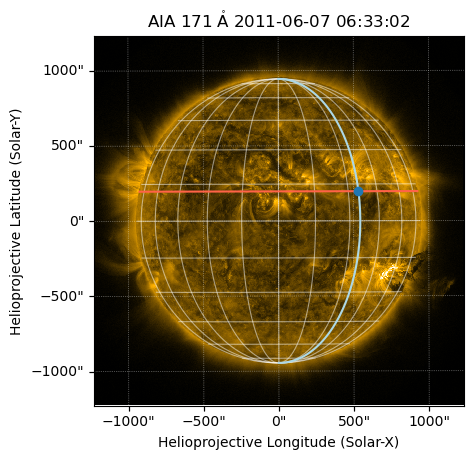

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(constant_lon, color="lightblue")
ax.plot_coord(constant_lat, color="tomato")
ax.plot_coord(point_in_stonyhurst, marker="o")
aia.draw_grid(axes=ax)

plt.show()